                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Accuracy: 0.8941


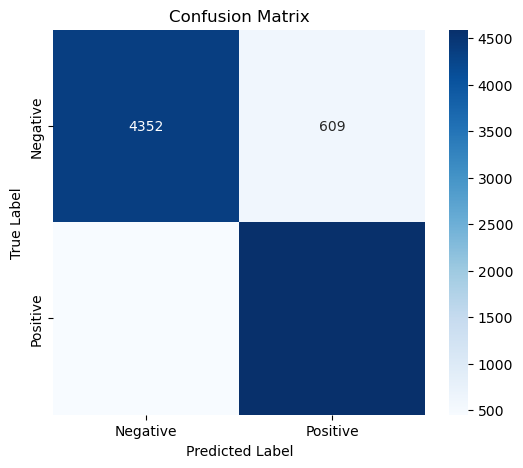

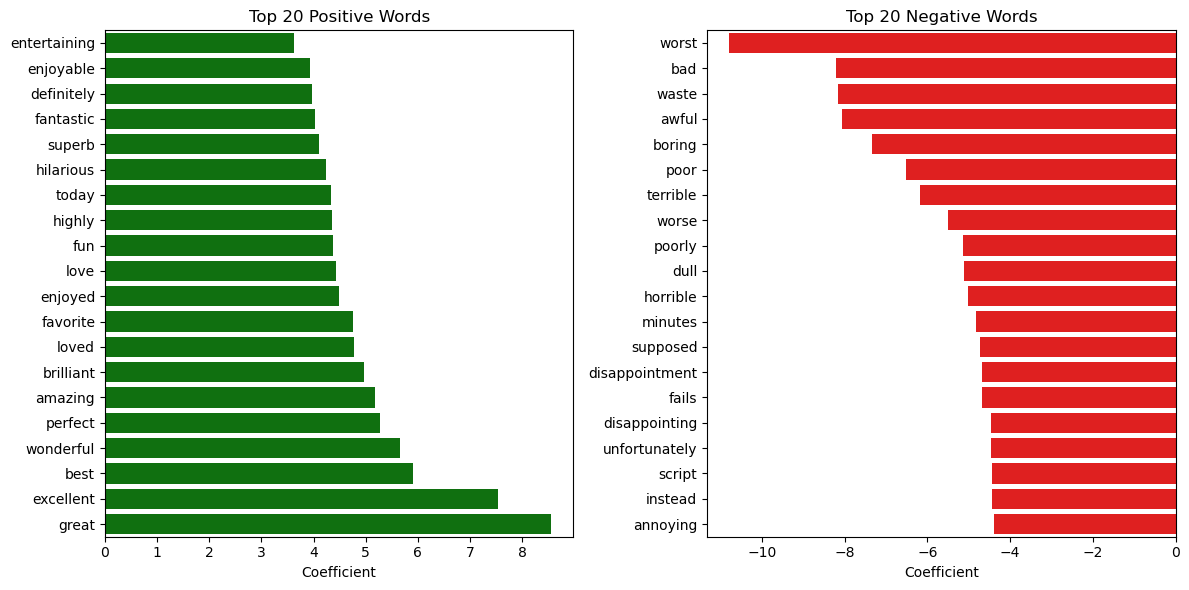

In [7]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Load dataset from CSV
dataset_path = r"C:\\Users\\Student\\Downloads\\IMDB Dataset.csv\\IMDB Dataset.csv"
df = pd.read_csv(dataset_path)

# Optional: preview the data
print(df.head())

# 2. Encode labels: positive → 1, negative → 0
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# 3. Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42
)

# 4. Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 5. Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# 6. Predict and evaluate
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 7. Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 8. Visualize top words
feature_names = np.array(vectorizer.get_feature_names_out())
coefs = model.coef_[0]

top_positive_indices = np.argsort(coefs)[-20:]
top_negative_indices = np.argsort(coefs)[:20]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=coefs[top_positive_indices], y=feature_names[top_positive_indices], color='green')
plt.title('Top 20 Positive Words')
plt.xlabel('Coefficient')

plt.subplot(1, 2, 2)
sns.barplot(x=coefs[top_negative_indices], y=feature_names[top_negative_indices], color='red')
plt.title('Top 20 Negative Words')
plt.xlabel('Coefficient')

plt.tight_layout()
plt.show()